In [1]:
import pandas as pd

In [2]:
seed = 14 #Definir secuencia aleatoria

In [3]:
df = pd.read_excel('./Taxi_Kal.xlsx')
df

,Tiempo_Vehiculo,Consumo_Mensual,Uso_Medio_Diario,Proveedor_Local,Zona_recorrido,Tecnologia_motor,Output1,Output2
0,10,375,2,1,1,3,0,Funcionando
1,18,445,19,1,1,3,1,Fallas
2,16,346,20,1,2,2,1,Fallas
3,23,472,16,2,2,2,1,Fallas
4,9,360,20,2,1,3,0,Funcionando
...,...,...,...,...,...,...,...,...
394,5,311,8,1,2,1,0,Funcionando
395,2,343,14,3,2,1,1,Fallas
396,23,439,15,2,2,1,1,Fallas
397,2,197,11,2,1,2,0,Funcionando


In [4]:
df.isnull().sum() #verificamos la existencias de valores nulos

Tiempo_Vehiculo     0
Consumo_Mensual     0
Uso_Medio_Diario    0
Proveedor_Local     0
Zona_recorrido      0
Tecnologia_motor    0
Output1             0
Output2             0
dtype: int64

In [5]:
X = df.iloc[:,0:6]
y = df.iloc[:,6]

In [6]:
X

,Tiempo_Vehiculo,Consumo_Mensual,Uso_Medio_Diario,Proveedor_Local,Zona_recorrido,Tecnologia_motor
0,10,375,2,1,1,3
1,18,445,19,1,1,3
2,16,346,20,1,2,2
3,23,472,16,2,2,2
4,9,360,20,2,1,3
...,...,...,...,...,...,...
394,5,311,8,1,2,1
395,2,343,14,3,2,1
396,23,439,15,2,2,1
397,2,197,11,2,1,2


In [7]:
y

0      0
1      1
2      1
3      1
4      0
      ..
394    0
395    1
396    1
397    0
398    0
Name: Output1, Length: 399, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split #training and testing data split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed,stratify=df['Output1'])

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []

tree_10 = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=seed, min_samples_leaf=10)
estimators.append(('tree_clf_10', tree_10))

tree_15 = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=seed, min_samples_leaf=15)
estimators.append(('tree_clf_15', tree_15))

tree_20 = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=seed, min_samples_leaf=20)
estimators.append(('tree_clf_20', tree_20))

In [10]:
# create the ensemble model
ensemble = VotingClassifier(estimators = estimators, voting='hard')

In [11]:
clf = ensemble.fit(X_train, y_train)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

Text(0.5, 1.0, 'ROC & AUC')

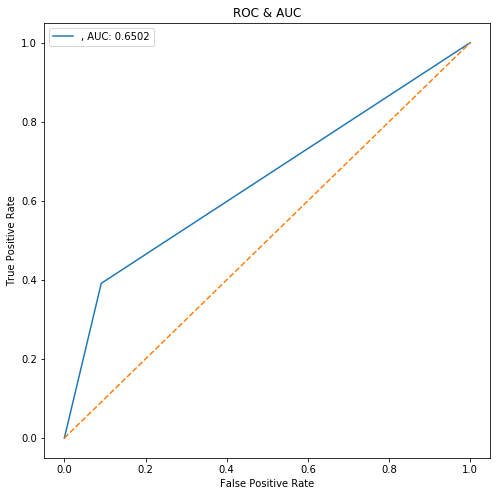

In [14]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8) 

fpr,tpr,_  = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,label=str(", AUC: %.4f"%auc(fpr,tpr)))

plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC & AUC')

In [17]:
from sklearn.metrics import accuracy_score

for clf in (tree_10, tree_15, tree_20):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.79
DecisionTreeClassifier 0.79
DecisionTreeClassifier 0.78


In [18]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)

C:\Users\Aron\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [19]:
print(results.mean())

0.8021794871794871
